## Тема “Обучение без учителя”

#### Задание 1

In [2]:
# Импортируйте библиотеки pandas, numpy и matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

from sklearn.datasets import load_boston
boston = load_boston()


In [8]:
# Создайте датафреймы X и y из этих данных

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [12]:
# Разбейте эти датафреймы на тренировочные
# (X_train, y_train) и тестовые (X_test, y_test) 
# с помощью функции train_test_split так,
# чтобы размер тестовой выборки составлял 20% от 
# всех данных, при этом аргумент
# random_state должен быть равен 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [17]:
# Масштабируйте данные с помощью StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

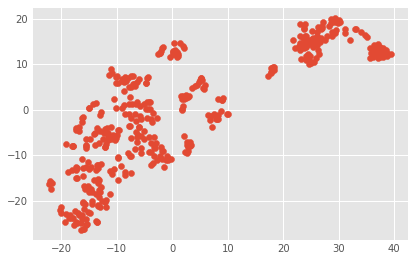

In [25]:
# Постройте диаграмму рассеяния на этих данных.
plt.style.use('ggplot')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2

In [27]:
from sklearn.cluster import KMeans

In [28]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

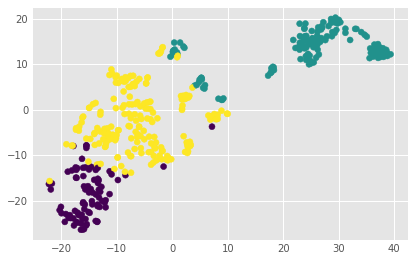

In [29]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки 
# из разных кластеров разными цветами.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [36]:
# Вычислите средние значения price и CRIM в разных кластерах.
print('Кластер 0:', y_train[labels_train == 0].mean())
print('Кластер 1:', y_train[labels_train == 1].mean())
print('Кластер 2:', y_train[labels_train == 2].mean())

Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663
Кластер 2: 24.958115183246072


In [38]:
print('Кластер 0:', X_train.loc[labels_train == 0, 'CRIM'].mean())
print('Кластер 1:', X_train.loc[labels_train == 1, 'CRIM'].mean())
print('Кластер 2:', X_train.loc[labels_train == 2, 'CRIM'].mean())

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


#### *Задание 3

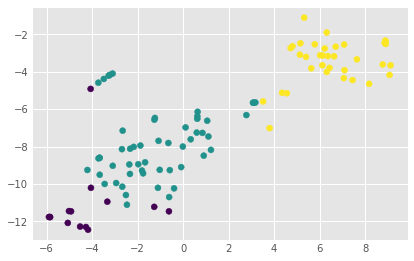

In [48]:
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()


In [51]:
print('Кластер 0:', X_test['CRIM'][labels_test == 0].mean())
print('Кластер 1:', X_test['CRIM'][labels_test== 1].mean())
print('Кластер 2:', X_test['CRIM'][labels_test== 2].mean())

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
